In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
temperatureDF = pd.read_csv("D:\Documents\Datasets\TemperaturasGlobais\TemperaturasGlobais.csv")

In [3]:
display(temperatureDF)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [4]:
temperatureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [5]:
temperatureDF = temperatureDF.rename(columns = {"dt": "Date"})
temperatureDF["Date"] = pd.to_datetime(temperatureDF["Date"])

In [6]:
temperatureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Date                           datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [7]:
temperatureDF.isna().sum()

Date                                  0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [8]:
temperatureDF["Year"] = temperatureDF["Date"].dt.year
temperatureDF["Year"] = temperatureDF["Year"].astype("int64")
temperatureDF["Month"] = temperatureDF["Date"].dt.month
temperatureDF["Month"] = temperatureDF["Month"].astype("int64")
temperatureDF = temperatureDF.dropna()
# temperatureDF.fillna(method = "ffill", inplace = True)

In [9]:
brazilDF = temperatureDF.drop(temperatureDF[~temperatureDF.Country.isin(["Brazil"])].index)
display(brazilDF)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
152741,1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W,1832,1
152742,1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W,1832,2
152743,1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W,1832,3
152744,1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W,1832,4
152745,1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W,1832,5
...,...,...,...,...,...,...,...,...,...
8109067,2013-04-01,20.240,0.483,Volta Redonda,Brazil,21.70S,44.13W,2013,4
8109068,2013-05-01,18.377,0.527,Volta Redonda,Brazil,21.70S,44.13W,2013,5
8109069,2013-06-01,18.072,0.398,Volta Redonda,Brazil,21.70S,44.13W,2013,6
8109070,2013-07-01,17.539,0.646,Volta Redonda,Brazil,21.70S,44.13W,2013,7


In [10]:
brazilDF.isna().sum()

Date                             0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Year                             0
Month                            0
dtype: int64

In [11]:
display(brazilDF)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
152741,1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W,1832,1
152742,1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W,1832,2
152743,1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W,1832,3
152744,1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W,1832,4
152745,1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W,1832,5
...,...,...,...,...,...,...,...,...,...
8109067,2013-04-01,20.240,0.483,Volta Redonda,Brazil,21.70S,44.13W,2013,4
8109068,2013-05-01,18.377,0.527,Volta Redonda,Brazil,21.70S,44.13W,2013,5
8109069,2013-06-01,18.072,0.398,Volta Redonda,Brazil,21.70S,44.13W,2013,6
8109070,2013-07-01,17.539,0.646,Volta Redonda,Brazil,21.70S,44.13W,2013,7


In [12]:
print(brazilDF["City"].unique())

['Alagoinhas' 'Americana' 'Anápolis' 'Ananindeua' 'Angra Dos Reis'
 'Apucarana' 'Araçatuba' 'Aracaju' 'Araguaína' 'Arapiraca' 'Araraquara'
 'Araras' 'Araruama' 'Araucária' 'Atibaia' 'Barbacena' 'Barra Mansa'
 'Barreiras' 'Barretos' 'Barueri' 'Bauru' 'Belém' 'Belford Roxo'
 'Belo Horizonte' 'Betim' 'Birigui' 'Blumenau' 'Boa Vista' 'Botucatu'
 'Bragança Paulista' 'Brasília' 'Cabo Frio' 'Cachoeirinha'
 'Cachoeiro De Itapemirim' 'Camaçari' 'Camaragibe' 'Campina Grande'
 'Campinas' 'Campo Grande' 'Campos' 'Canoas' 'Carapicuíba' 'Cariacica'
 'Caruaru' 'Cascavel' 'Castanhal' 'Catanduva' 'Caucaia' 'Caxias'
 'Caxias Do Sul' 'Chapecó' 'Colatina' 'Colombo' 'Conselheiro Lafaiete'
 'Contagem' 'Coronel Fabriciano' 'Cotia' 'Criciúma' 'Cubatão' 'Cuiabá'
 'Curitiba' 'Diadema' 'Divinópolis' 'Dourados' 'Duque De Caxias' 'Embu'
 'Esmeraldas' 'Feira De Santana' 'Ferraz De Vasconcelos' 'Florianópolis'
 'Fortaleza' 'Foz Do Iguaçu' 'Franca' 'Francisco Morato' 'Franco Da Rocha'
 'Garanhuns' 'Goiânia' 'Governad

In [13]:
# capitals = ["Aracaju", "Belém", "Belo Horizonte", "Boa Vista", "Brasília", "Campo Grande", "Cuiabá", "Curitiba", 
#             "Florianópolis", "Fortaleza", "Goiânia", "João Pessoa", "Macapá", "Maceió", "Manaus", "Natal", "Palmas", "Porto Alegre", 
#             "Pôrto Velho", "Recife", "Rio Branco", "Rio De Janeiro", "Salvador", "São Luís", "São Paulo", "Teresina", "Vitória"]

regions = {
    "Norte": ["Belém", "Boa Vista", "Macapá", "Manaus", "Palmas", "Pôrto Velho", "Rio Branco"],
    "Nordeste": ["Aracaju", "Fortaleza", "João Pessoa", "Maceió", "Natal", "Recife", "Salvador", "São Luís", "Teresina"],
    "CentroOeste": ["Brasília", "Campo Grande", "Cuiabá", "Goiânia"],
    "Sudeste": ["Belo Horizonte", "Rio De Janeiro", "São Paulo", "Vitória"],
    "Sul": ["Curitiba", "Florianópolis", "Porto Alegre"]
}
years = [1870, 1910, 1950, 1990, 2012]

In [14]:
def tempPlot(cityDF, *args, xValue = "Month", yValue = "AverageTemperature", hValue = "Year", passedCity = True):
    if passedCity:
        city = args[0]
        fig, axes = plt.subplots(figsize = (15, 5))
    else:
        fig, axes = plt.subplots(figsize = (30, 5))
    sns.lineplot(x = xValue, y = yValue, hue = hValue, data = cityDF, palette = "tab10")
    if passedCity:
        axes.set(xlabel = xValue, ylabel = yValue, title = f"Temperaturas anuais da cidade de {city}")
        plt.xticks(np.arange(1, 13, 1))
    else:
        axes.set(xlabel = xValue, ylabel = yValue, title = f"Temperatura média das capitais ao longo dos anos")
        plt.xticks(np.arange(1870, max(cityDF[xValue]), 5))
    plt.yticks(np.arange(round(min(cityDF[yValue])-2), round(max(cityDF[yValue])+2), 1.0))
    plt.grid()
    plt.show()


Norte:


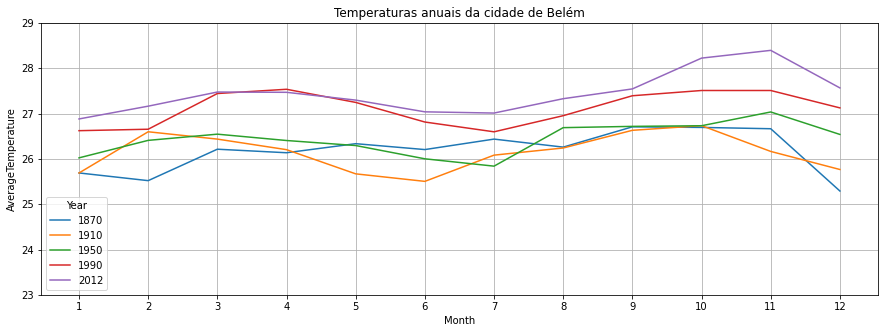

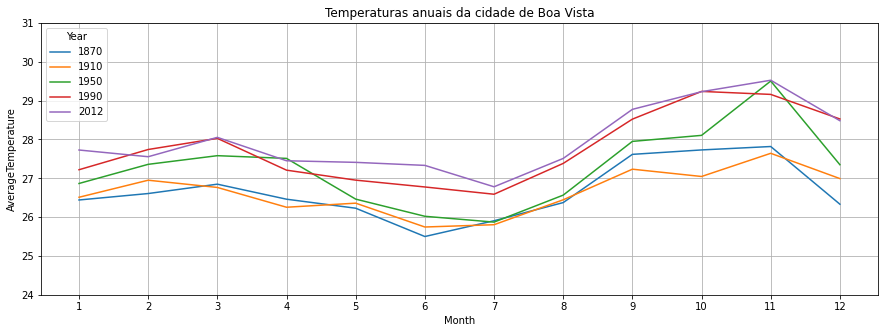

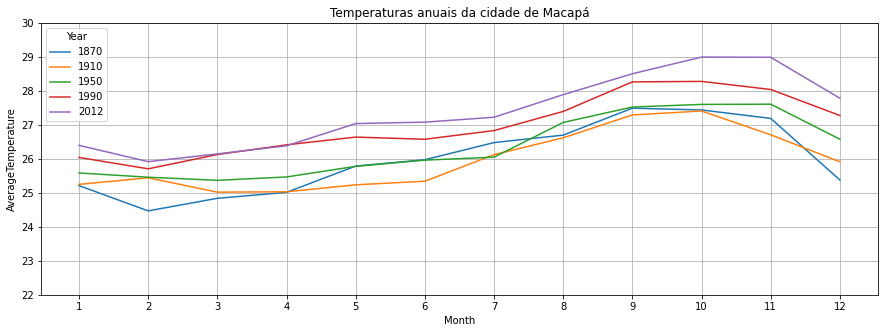

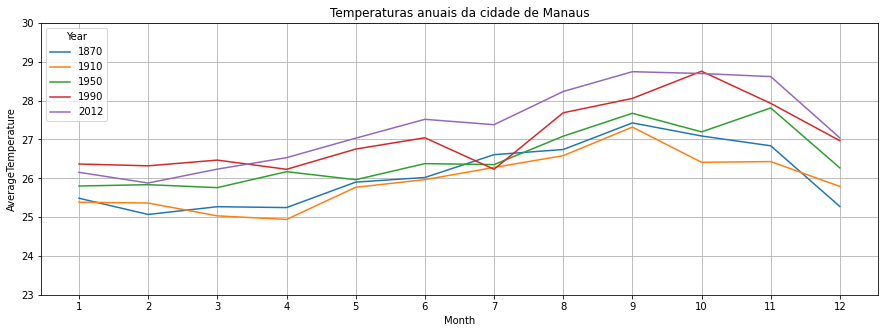

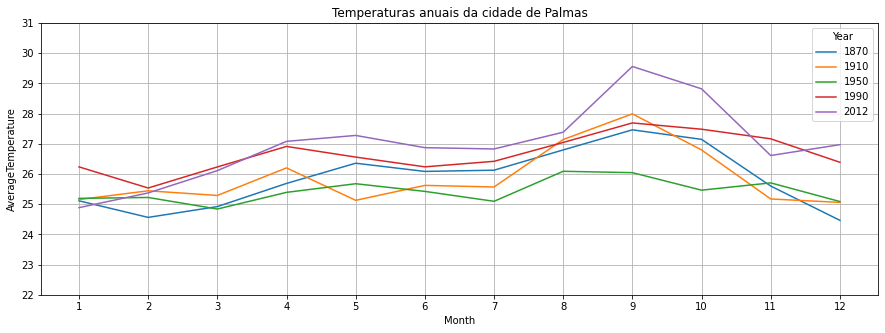

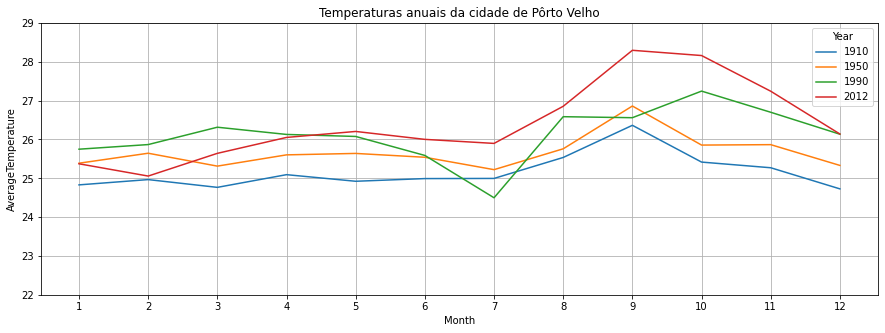

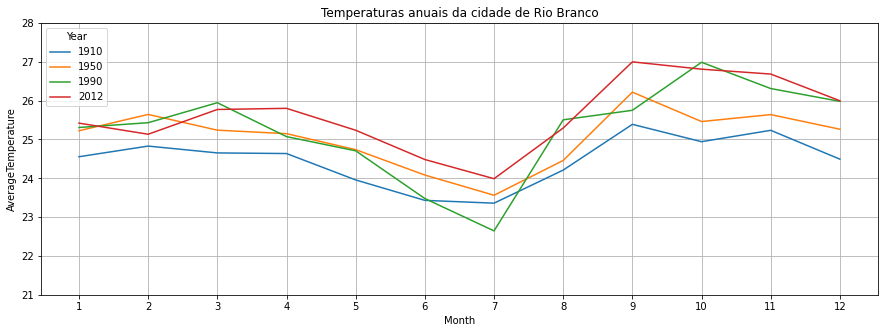

Nordeste:


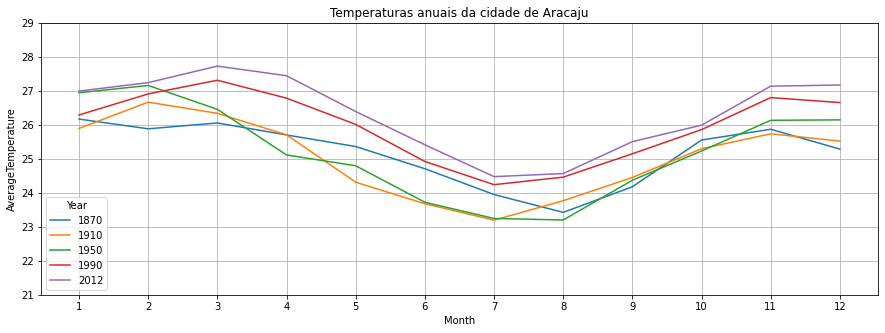

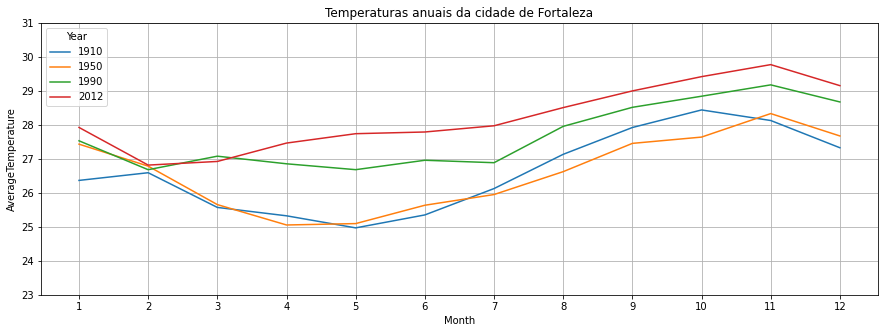

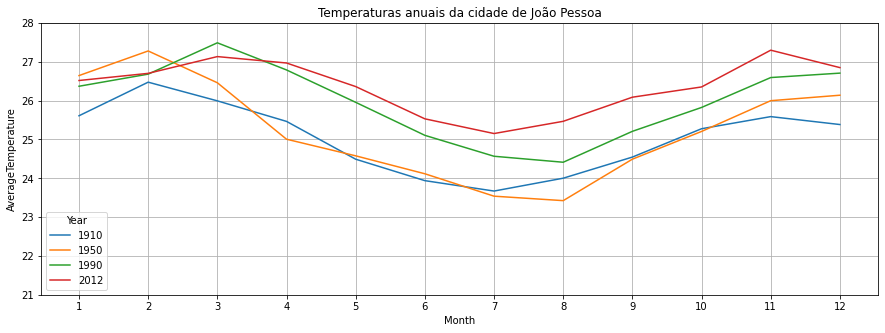

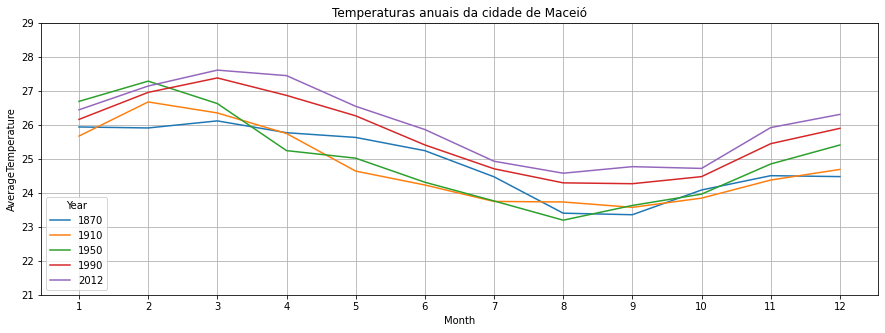

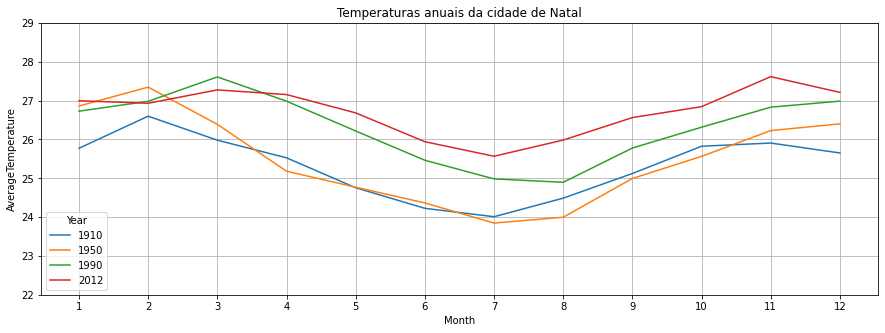

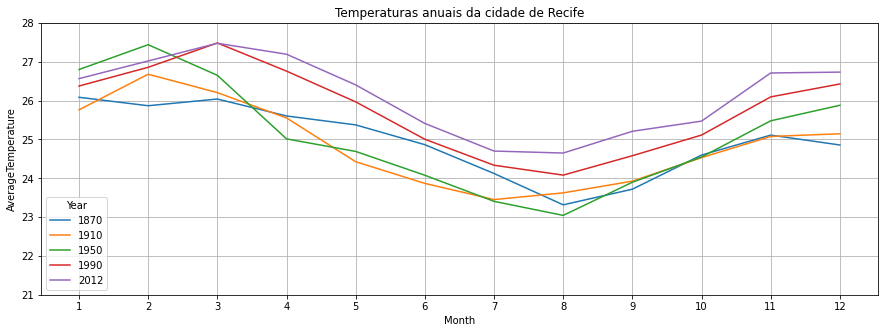

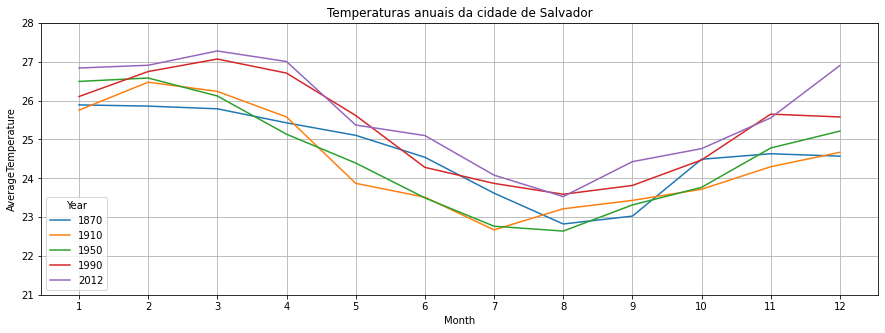

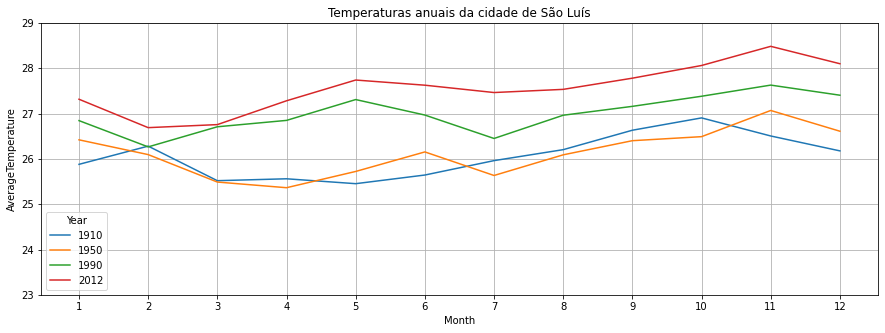

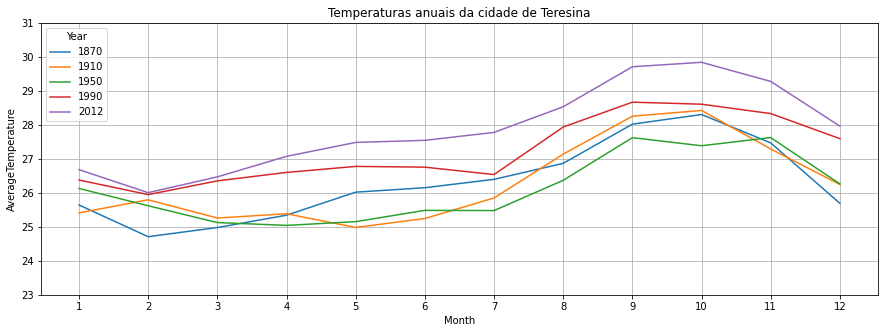

CentroOeste:


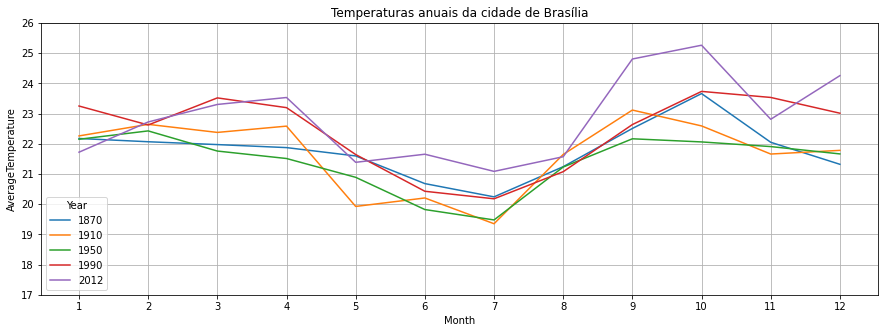

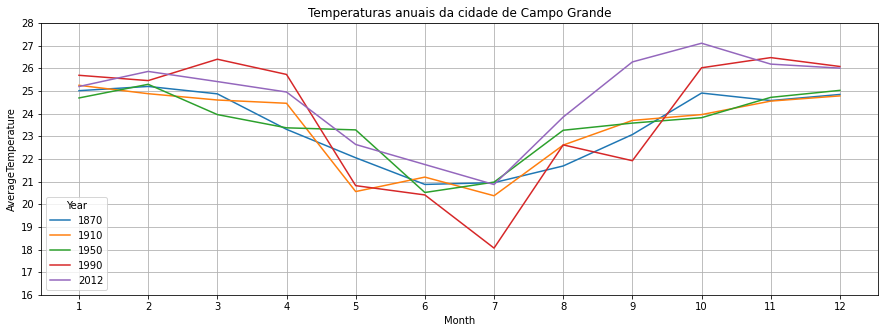

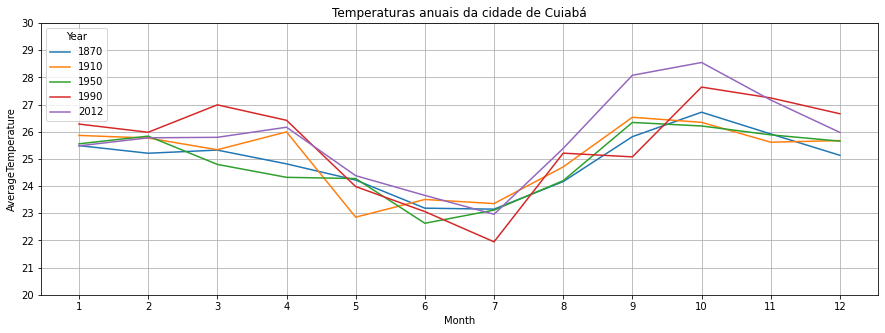

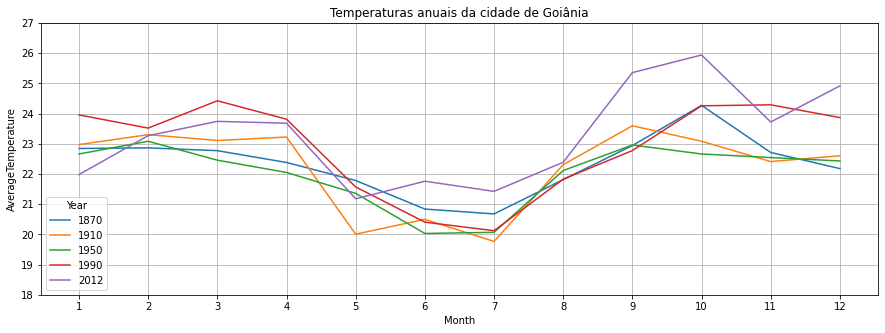

Sudeste:


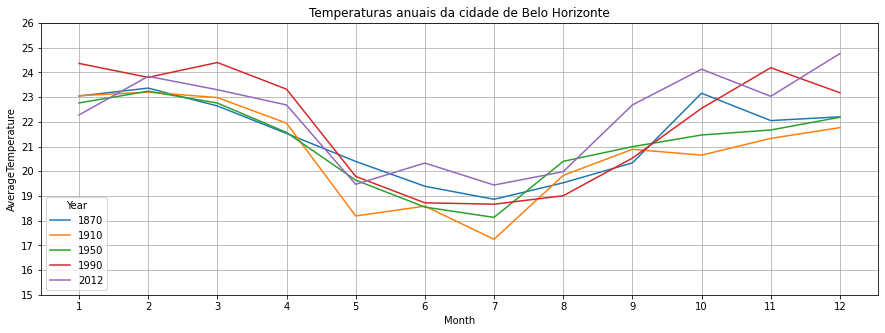

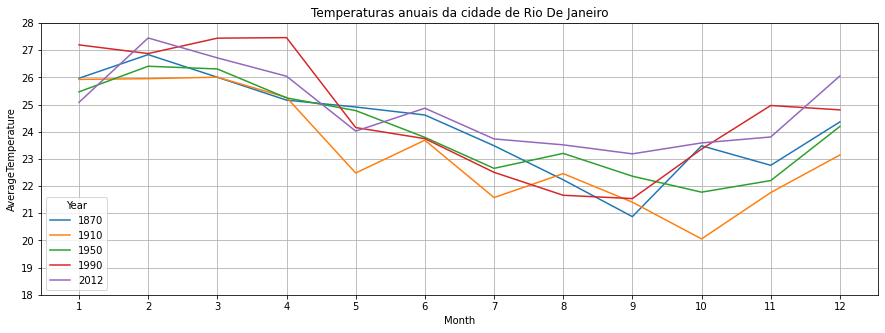

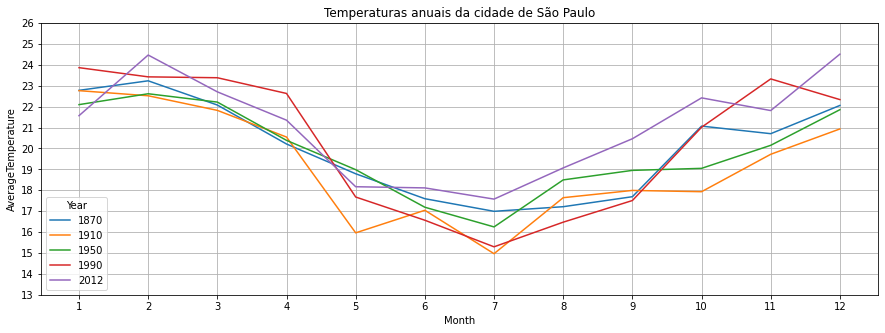

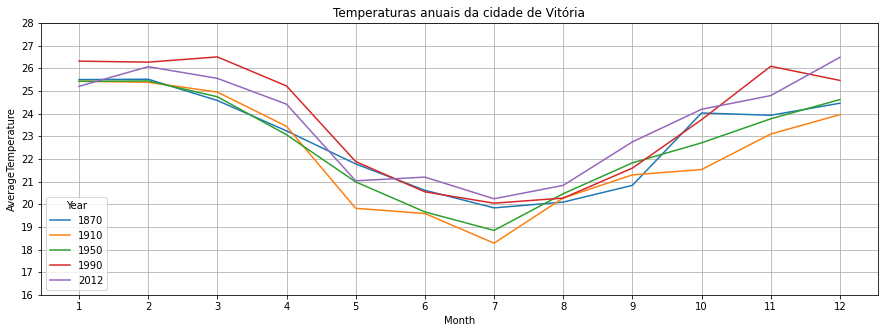

Sul:


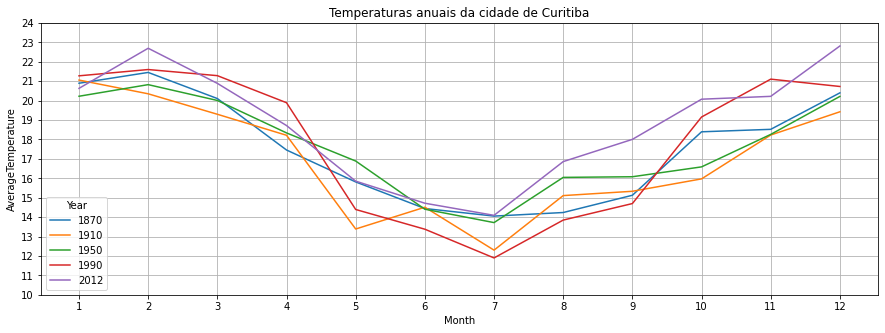

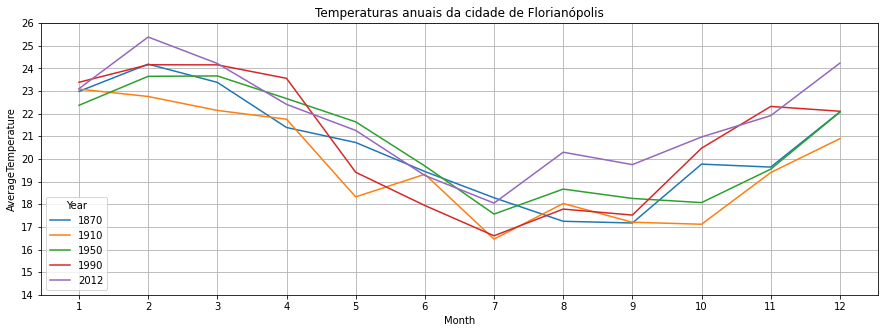

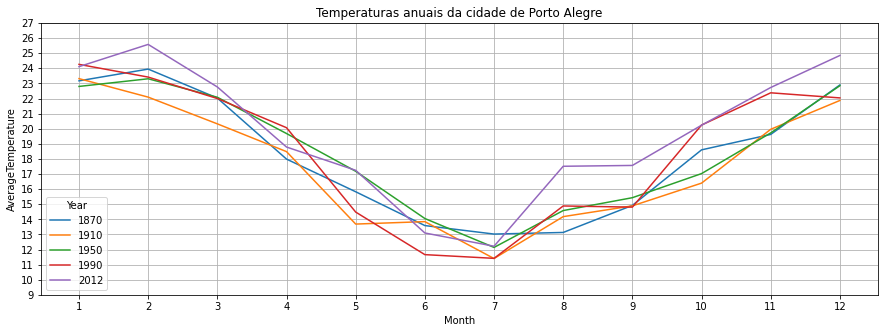

In [15]:
capitals = list()
for region in regions:
    print(f"{region}:")
    for city in regions[region]:
        capitals.append(city)
        cityDF = brazilDF.drop(brazilDF[~brazilDF.City.isin([city])].index)
        byYearDF = cityDF.drop(cityDF[~cityDF.Year.isin(years)].index)
        tempPlot(byYearDF, city)

In [16]:
newPlotDF = brazilDF.drop(brazilDF[~brazilDF.City.isin(capitals)].index)
newPlotDF = newPlotDF.groupby(["Year", "City"], sort = False).AverageTemperature.mean()
newPlotDF = newPlotDF.reset_index()


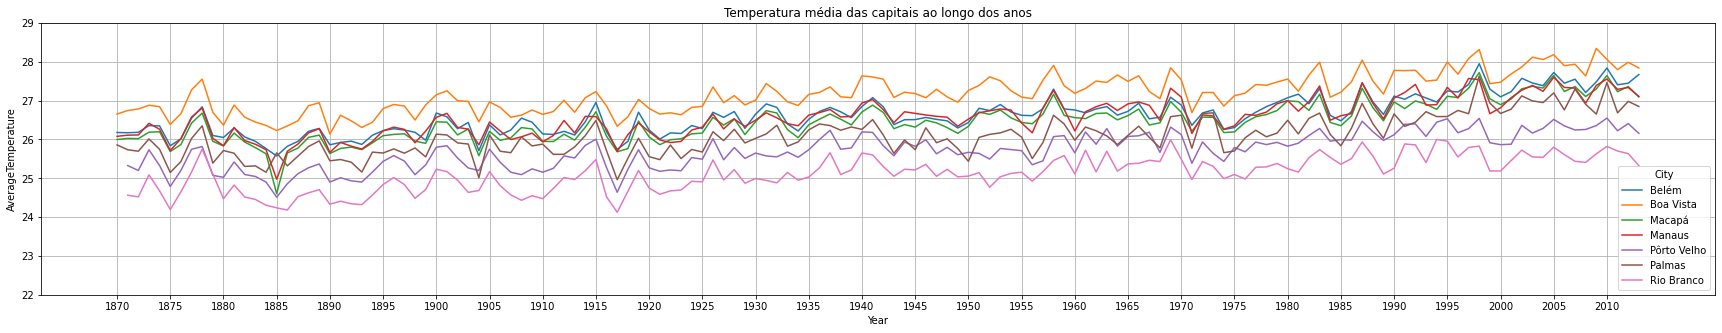

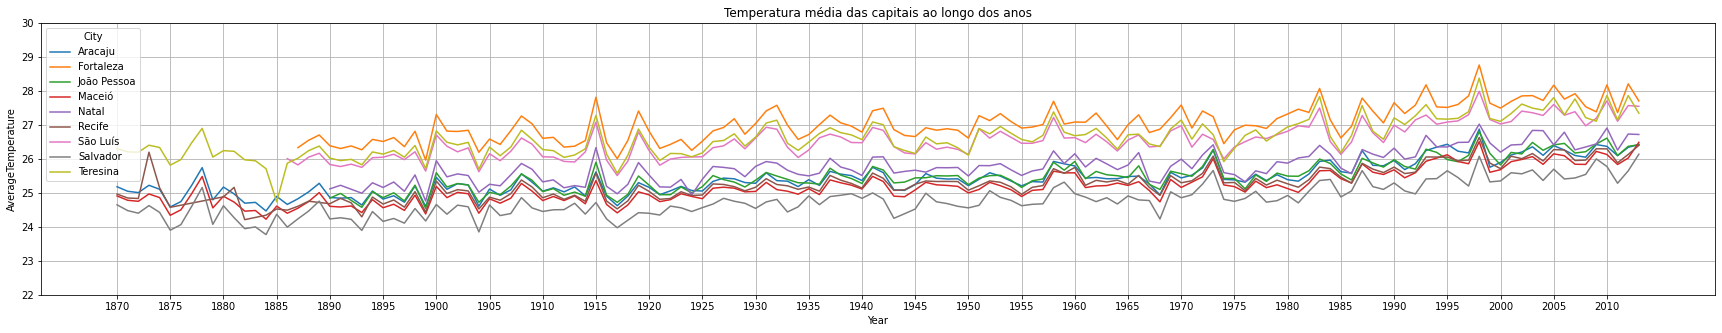

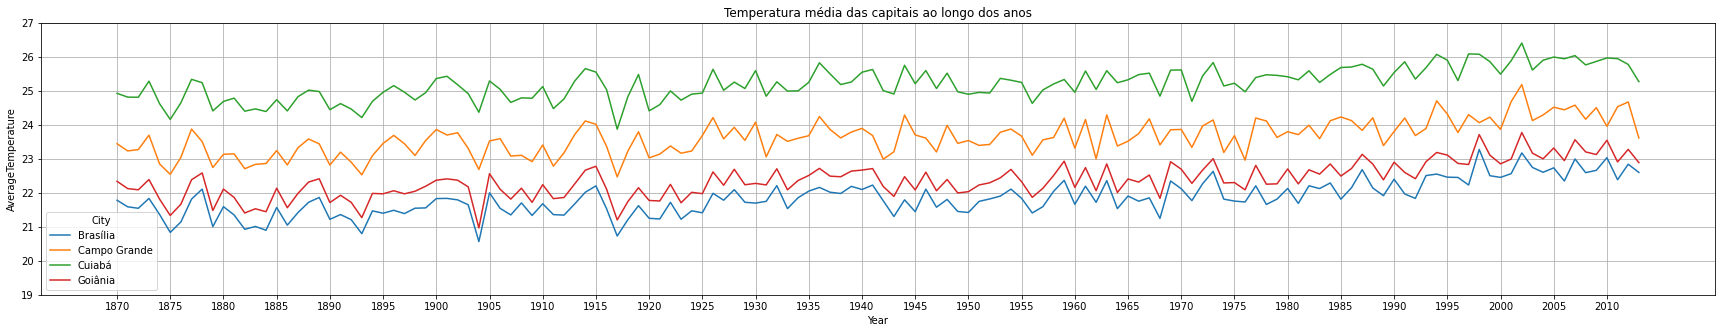

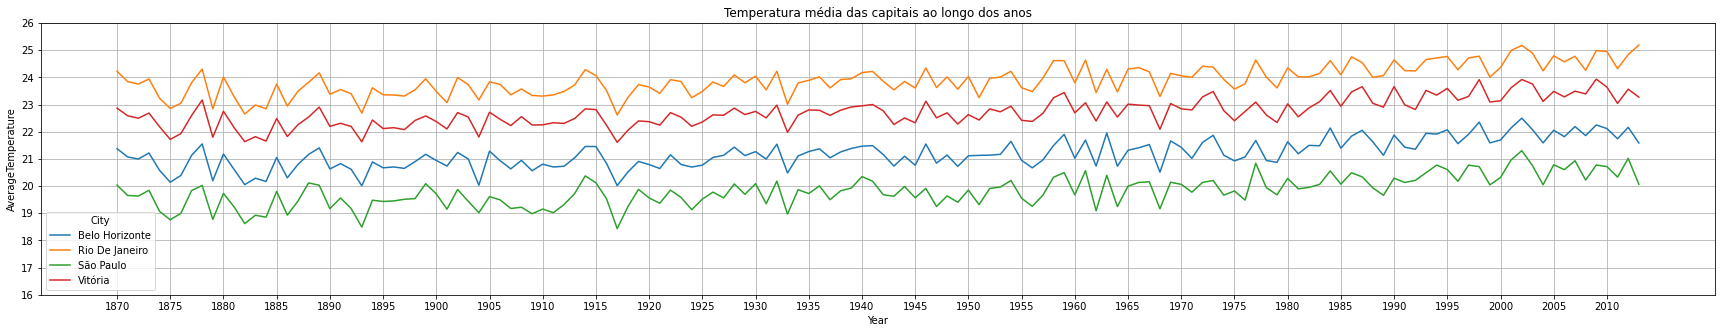

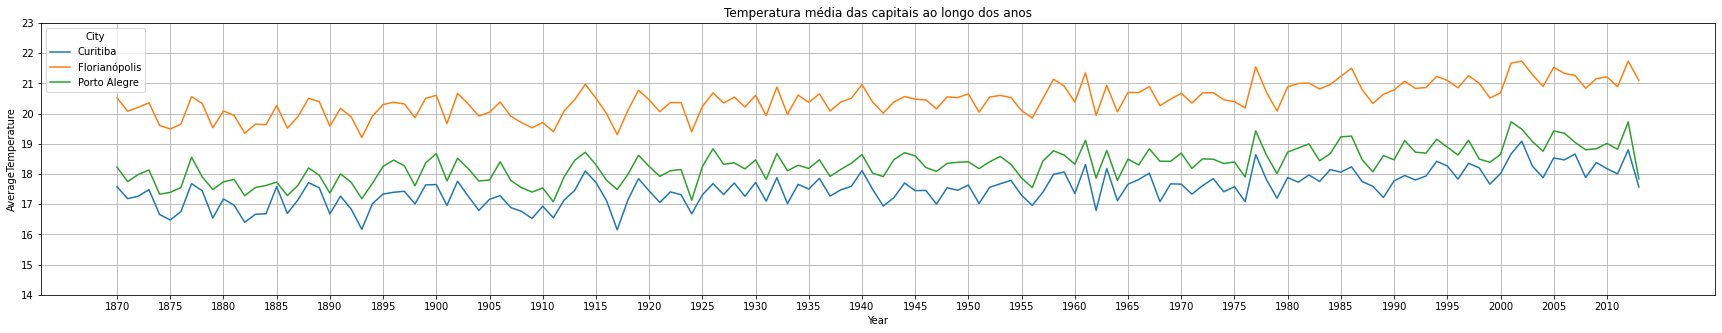

In [17]:

newPlotDF2 = newPlotDF[(newPlotDF["Year"] >= 1870)]
for i in regions:
    regionsDF = newPlotDF2.drop(newPlotDF2[~newPlotDF2.City.isin(regions[i])].index)
    tempPlot(regionsDF, xValue = "Year", hValue = "City", passedCity = False)


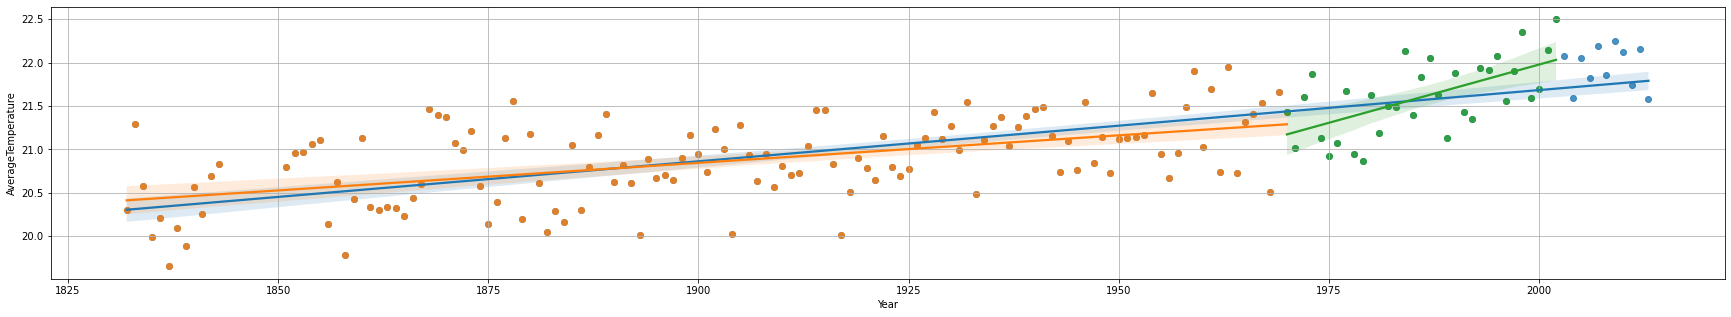

In [38]:
BHregDF = newPlotDF.drop(newPlotDF[~newPlotDF.City.isin(["Belo Horizonte"])].index)
BHregDF2 = BHregDF[(BHregDF["Year"] >= 1970) & (BHregDF["Year"] <= 1990)]
BHregDF3 = BHregDF[BHregDF["Year"] >= 1990]
BHregDF4 = BHregDF[BHregDF["Year"] <= 1970]
BHregDF5 = BHregDF[(BHregDF["Year"] >= 1970) & (BHregDF["Year"] <= 2002)]
plt.subplots(figsize = (30, 5))
sns.regplot(x = "Year", y = "AverageTemperature", data = BHregDF)
# sns.regplot(x = "Year", y = "AverageTemperature", data = BHregDF2)
# sns.regplot(x = "Year", y = "AverageTemperature", data = BHregDF3)
sns.regplot(x = "Year", y = "AverageTemperature", data = BHregDF4)
sns.regplot(x = "Year", y = "AverageTemperature", data = BHregDF5)
plt.grid()

In [ ]:
avgTemp1910 = temperatureDF.drop(temperatureDF[~temperatureDF.Year.isin([1910])].index)
avgTemp2010 = temperatureDF.drop(temperatureDF[~temperatureDF.Year.isin([2010])].index)

In [ ]:
print(f"Temperatura Média Global 1910: {avgTemp1910['AverageTemperature'].mean():.2f}C")
print(f'Temperatura Média Global 2010: {avgTemp2010["AverageTemperature"].mean():.2f}C')

Temperatura Média Global 1910: 17.28C
Temperatura Média Global 2010: 18.55C


In [ ]:
countries = list(temperatureDF["Country"].unique())
print(countries)

['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany', 'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire", 'United Kingdom', 'Saudi Arabia', 'Japan', 'United States', 'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela', 'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco', 'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa', 'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal', 'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar', 'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia', 'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea', 'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq', 'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali', 'Congo (Democratic Republic Of The)', 'Thailand', 'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh', 'Switzerland', 'Equatorial Guinea', 'Cuba', 'Lebanon', 'Mozambique', 'Serbia', 'Angola', 'Somalia', 'Norway', 'Nepal'

In [ ]:
countriesDF = pd.DataFrame()
